In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_spam = pd.read_csv("C:/Users/mouni/Downloads/SML/HW3/spambase/spambase.data")

In [3]:
data_spam = data_spam.rename(columns={'0':'word_freq_make','0.64':'word_freq_address',
                                      '0.64.1':'word_freq_all','0.1':'word_freq_3d',
                                      '0.32':'word_freq_our','0.2':'word_freq_over',
                                      '0.3':'word_freq_remove','0.4':'word_freq_internet',
                                      '0.5':'word_freq_order','0.6':'word_freq_mail',
                                      '0.7':'word_freq_receive','0.64.2':'word_freq_will','0.8':'word_freq_people',
                                      '0.9':'word_freq_report','0.10':'word_freq_addresses','0.32.1':'word_freq_free',
                                      '0.11':'word_freq_business','1.29':'word_freq_email',
                                      '1.93':'word_freq_you','0.12':'word_freq_credit','0.96':'word_freq_your',
                                      '0.13':'word_freq_font','0.14':'word_freq_000','0.15':'word_freq_money',
                                      '0.16':'word_freq_hp','0.17':'word_freq_hpl','0.18':'word_freq_george',
                                      '0.19':'word_freq_650','0.20':'word_freq_lab','0.21':'word_freq_labs',
                                      '0.22':'word_freq_telnet','0.23':'word_freq_857','0.24':'word_freq_data',
                                      '0.25':'word_freq_415','0.26':'word_freq_85','0.27':'word_freq_technology',
                                      '0.28':'word_freq_1999','0.29':'word_freq_parts','0.30':'word_freq_pm',
                                      '0.31':'word_freq_direct','0.32.2':'word_freq_cs','0.33':'word_freq_meeting',
                                      '0.34':'word_freq_original','0.35':'word_freq_project','0.36':'word_freq_re',
                                      '0.37':'word_freq_edu','0.38':'word_freq_table','0.39':'word_freq_conference',
                                      '0.40':'char_freq_semicolon','0.41':'char_freq_leftparen',
                                      '0.42':'char_freq_leftsquare','0.778':'char_freq_bang',
                                      '0.43':'char_freq_dollar','0.44':'char_freq_hash',
                                      '3.756':'capital_run_length_average','61':'capital_run_length_longest',
                                      '278':'capital_run_length_total','1':'is_spam'})

In [4]:
data_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftparen,char_freq_leftsquare,char_freq_bang,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
data_y = data_spam['is_spam']
data_x = data_spam.drop(columns = ['is_spam'])
data_x.shape

(4600, 57)

In [6]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data_x)
data_scaled.shape

(4600, 57)

In [7]:
df = pd.DataFrame(data=data_scaled[:,0:],
                  index=data_scaled[:,0],
                  columns=['word_freq_make', 'word_freq_address','word_freq_all', 'word_freq_3d', 'word_freq_our',
                           'word_freq_over', 'word_freq_remove', 'word_freq_internet','word_freq_order', 'word_freq_mail',
                           'word_freq_receive','word_freq_will', 'word_freq_people', 'word_freq_report',
                           'word_freq_addresses', 'word_freq_free', 'word_freq_business','word_freq_email',
                           'word_freq_you', 'word_freq_credit', 'word_freq_your','word_freq_font', 'word_freq_000',
                           'word_freq_money', 'word_freq_hp','word_freq_hpl', 'word_freq_george', 'word_freq_650',
                           'word_freq_lab','word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
                           'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999','word_freq_parts',
                           'word_freq_pm', 'word_freq_direct', 'word_freq_cs','word_freq_meeting', 'word_freq_original',
                           'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
                           'word_freq_conference', 'char_freq_semicolon', 'char_freq_leftparen', 'char_freq_leftsquare',
                           'char_freq_bang', 'char_freq_dollar', 'char_freq_hash','capital_run_length_average',
                           'capital_run_length_longest', 'capital_run_length_total'])

In [8]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftparen,char_freq_leftsquare,char_freq_bang,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0.345252,0.345252,0.051976,0.435261,-0.046905,-0.256087,0.672259,0.244655,-0.088058,-0.323341,1.086529,...,-0.111559,-0.158471,-0.026117,-0.155215,0.126330,0.423674,0.008739,-0.002453,0.250546,1.228189
-0.145982,-0.145982,-0.164984,0.851833,-0.046905,1.364700,0.343576,0.193562,0.036609,1.973754,0.016339,...,-0.111559,-0.117398,0.014571,-0.155215,0.008631,0.439942,-0.079768,0.145895,2.220875,3.258376
-0.342475,-0.342475,-0.164984,-0.556576,-0.046905,0.472524,-0.350309,0.500124,1.308212,0.789315,0.605719,...,-0.111559,-0.158471,-0.007622,-0.155215,-0.161788,-0.308392,-0.103060,-0.052154,-0.062450,-0.152207
-0.342475,-0.342475,-0.164984,-0.556576,-0.046905,0.472524,-0.350309,0.500124,1.308212,0.789315,0.605719,...,-0.111559,-0.158471,-0.015020,-0.155215,-0.164240,-0.308392,-0.103060,-0.052154,-0.062450,-0.152207
-0.342475,-0.342475,-0.164984,-0.556576,-0.046905,2.286616,-0.350309,-0.291828,4.350087,-0.323341,-0.371410,...,-0.111559,-0.158471,0.310487,-0.155215,-0.329755,-0.308392,-0.103060,-0.069079,-0.190726,-0.378150


### Problem 1 [Logistic regression]

**1 (a) Split the original data into 75% for training and 25% for testing. Choose the training set at random and ensure that the fraction of SPAM examples in the training set is close to the fraction of 39.4% SPAM examples in the entire dataset. Train a logistic regression model on the training set and output the following on the testing set:**
1. Confusion matrix 
2. True Positives, False Positives, True Negatives, False Negatives
3. Accuracy, Error
4. Precision, Recall, F1 score

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(df, data_y, test_size = 0.25, random_state = 0)

In [10]:
len(yTrain.loc[yTrain == 1])/len(xTrain)

0.392463768115942

#### Logistic Regression on training data

In [11]:
logisticRegr = LogisticRegression()
fit1 = logisticRegr.fit(xTrain, yTrain)
fit1

C:\Users\mouni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
predictions = logisticRegr.predict(xTest)


#### Confusion Matrix

In [13]:
cm = metrics.confusion_matrix(yTest, predictions)
print(cm)
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]

[[656  36]
 [ 45 413]]


#### Accuracy score of the model and evalution metrics

In [14]:
score = logisticRegr.score(xTest, yTest)
print(score)

0.9295652173913044


In [15]:
print(metrics.classification_report(yTest, predictions))
print("\nCross entrophy: ", metrics.log_loss(yTest,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       692
           1       0.92      0.90      0.91       458

    accuracy                           0.93      1150
   macro avg       0.93      0.92      0.93      1150
weighted avg       0.93      0.93      0.93      1150


Cross entrophy:  2.432756237821959


#### Calculating accuracy, precision and recall using confusion matrix

In [16]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:", ACC)

# Recall
recall = TP/(TP+FN)
print("Recall:", recall)

# Precision 
precision = TP/(TP+FP)
print("Precision:", precision)

# Error
print("Error:", 1-ACC)

# F1 Score
f1 = 2*((precision*recall)/(precision+recall))
print("F1 score:", f1)

Accuracy: 0.9295652173913044
Recall: 0.9017467248908297
Precision: 0.9198218262806236
Error: 0.07043478260869562
F1 score: 0.9106945975744211


**1 (b) Print the coefficients of the features in the model. Which features contribute mostly to the prediction? Which ones are positively correlated and which ones are negatively correlated with the SPAM class?**

In [17]:
xTest.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [18]:
fit1.coef_

array([[-0.11025964, -0.2421029 ,  0.0744696 ,  1.00509894,  0.32554939,
         0.19228165,  0.92593544,  0.19723677,  0.12351767,  0.06294884,
        -0.10617344, -0.15743851,  0.03537821,  0.0268677 ,  0.28783505,
         0.95061687,  0.40331579,  0.06210778,  0.15550624,  0.38409911,
         0.25433162,  0.21443443,  0.79562219,  0.14887934, -2.27372541,
        -0.8708625 , -3.96469735,  0.24012464, -1.00747867, -0.07162933,
        -1.88766095, -0.07221077, -0.51984058,  0.0187023 , -1.0567242 ,
         0.3471644 ,  0.03334317,  0.05257299, -0.31556135, -0.09045731,
        -1.70289729, -1.47481818, -0.1690304 , -0.77961417, -0.79855884,
        -1.3190043 , -0.18852476, -0.91685298, -0.29457888, -0.00719737,
        -0.1671911 ,  0.23197986,  1.14918891,  0.71332883,  2.06528337,
         1.76808093,  0.39388566]])

#### The features that contribute mostly to the prediction are 
- capital_run_length_average
- capital_run_length_longest
- char_freq_dollar

#### Positively correlated features with SPAM class

#### Negatively correlated features with SPAM class

**1 (c) Vary the decision threshold T ∈ {0.25, 0.5, 0.75, 0.9} and report for each value the model accuracy, precision, and recall. Comment on how these metrics vary with the choice of threshold.**

#### Threshold = 0.5

In [20]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.5

prediction_T = prediction_T[:,0]
cm_05 = metrics.confusion_matrix(yTest, prediction_T)
print(cm)
TN_05 = cm_05[0][0]
FN_05 = cm_05[1][0]
FP_05 = cm_05[0][1]
TP_05 = cm_05[1][1]


[[656  36]
 [ 45 413]]


In [21]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:", ACC)

# Sensitivity, hit rate, recall, or true positive rate
recall = TP/(TP+FN)
print("Recall:", recall)

# Precision or positive predictive value
precision = TP/(TP+FP)
print("Precision:", precision)

# Error
print("Error:", 1-ACC)

# F1 Score
f1 = 2*((precision*recall)/(precision+recall))
print("F1 score:", f1)

Accuracy: 0.9295652173913044
Recall: 0.9017467248908297
Precision: 0.9198218262806236
Error: 0.07043478260869562
F1 score: 0.9106945975744211


#### Threshold = 0.25

In [21]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.25

prediction_T = prediction_T[:,0]
cm = metrics.confusion_matrix(yTest, prediction_T)
print(cm)
TN = cm[1][0]
FN = cm[0][0]
FP = cm[1][1]
TP = cm[0][1]


[[ 15 677]
 [363  95]]


In [22]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:", ACC)

# Sensitivity, hit rate, recall, or true positive rate
recall = TP/(TP+FN)
print("Recall:", recall)

# Precision or positive predictive value
precision = TP/(TP+FP)
print("Precision:", precision)

# Error
print("Error:", 1-ACC)

# F1 Score
f1 = 2*((precision*recall)/(precision+recall))
print("F1 score:", f1)

Accuracy: 0.9043478260869565
Recall: 0.9783236994219653
Precision: 0.8769430051813472
Error: 0.09565217391304348
F1 score: 0.924863387978142


#### Threshold = 0.75

In [23]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.75

prediction_T = prediction_T[:,0]
cm = metrics.confusion_matrix(yTest, prediction_T)
print(cm)
TN = cm[1][0]
FN = cm[0][0]
FP = cm[1][1]
TP = cm[0][1]


[[101 591]
 [445  13]]


In [24]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:", ACC)

# Sensitivity, hit rate, recall, or true positive rate
recall = TP/(TP+FN)
print("Recall:", recall)

# Precision or positive predictive value
precision = TP/(TP+FP)
print("Precision:", precision)

# Error
print("Error:", 1-ACC)

# F1 Score
f1 = 2*((precision*recall)/(precision+recall))
print("F1 score:", f1)

Accuracy: 0.9008695652173913
Recall: 0.8540462427745664
Precision: 0.9784768211920529
Error: 0.09913043478260875
F1 score: 0.912037037037037


#### Threshold = 0.9

In [25]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.9

prediction_T = prediction_T[:,0]
cm = metrics.confusion_matrix(yTest, prediction_T)
print(cm)
TN = cm[1][0]
FN = cm[0][0]
FP = cm[1][1]
TP = cm[0][1]


[[228 464]
 [455   3]]


In [26]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:", ACC)

# Sensitivity, hit rate, recall, or true positive rate
recall = TP/(TP+FN)
print("Recall:", recall)

# Precision or positive predictive value
precision = TP/(TP+FP)
print("Precision:", precision)

# Error
print("Error:", 1-ACC)

# F1 Score
f1 = 2*((precision*recall)/(precision+recall))
print("F1 score:", f1)

Accuracy: 0.7991304347826087
Recall: 0.6705202312138728
Precision: 0.9935760171306209
Error: 0.2008695652173913
F1 score: 0.8006902502157032


**1 (d) Use your implementation of gradient descent from Homework 2 and adapt it for logistic regression. Take 3 values of the learning rate and report the cross-entropy loss objective after 10, 50, and 100 iterations. At 100 iterations, report the accuracy and F1 score for the 3 learning rates, and compare with the metrics given by the package.**

- Padding ones to the X variable

In [27]:
X1 = xTrain
X1['ones'] = 1

X2 = xTest
X2['ones'] = 1

C:\Users\mouni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mouni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
def gradient_descent(X,y,theta,alpha,n):
    
    m = len(y)
        
    for i in range(n):
        prediction = np.dot(X,theta)
        h = 1 / (1 + np.exp(-prediction))
        theta = theta - (1/m) * alpha * (X.T.dot(h - y))
        
    return theta

In [29]:
yTrain_gd = yTrain.to_numpy().reshape(yTrain.shape[0],1)

cross entrophy

In [37]:
alpha = 0.01
iter = [10,50,100]
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,alpha,i)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for i in range(len(yTest_pred_gd)):
        if yTest_pred_gd[i]>0.5:
            yTest_pred_gd[i] = 1
        else:
            yTest_pred_gd[i] = 0
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))        
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("confusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("report: \n",metrics.classification_report(yTest, yTest_pred_gd))
    
    


Cross entrophy:  11.08259791264905
mean squared error on scaled test data (GD): 0.3208695652173913
confusion matrix 
 [[468 224]
 [145 313]]
report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       692
           1       0.58      0.68      0.63       458

    accuracy                           0.68      1150
   macro avg       0.67      0.68      0.67      1150
weighted avg       0.69      0.68      0.68      1150

Cross entrophy:  10.121500144155345
mean squared error on scaled test data (GD): 0.29304347826086957
confusion matrix 
 [[495 197]
 [140 318]]
report: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       692
           1       0.62      0.69      0.65       458

    accuracy                           0.71      1150
   macro avg       0.70      0.70      0.70      1150
weighted avg       0.71      0.71      0.71      1150

Cross entrophy:  9.55085184235097
mean squ

In [31]:
alpha = 0.001
iter = [10,50,100]
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,alpha,i)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for i in range(len(yTest_pred_gd)):
        if yTest_pred_gd[i]>0.5:
            yTest_pred_gd[i] = 1
        else:
            yTest_pred_gd[i] = 0
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))            
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("confusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("report: \n",metrics.classification_report(yTest, yTest_pred_gd))

mean squared error on scaled test data (GD): 0.4165217391304348
confusion matrix 
 [[504 188]
 [291 167]]
report: 
               precision    recall  f1-score   support

           0       0.63      0.73      0.68       692
           1       0.47      0.36      0.41       458

    accuracy                           0.58      1150
   macro avg       0.55      0.55      0.54      1150
weighted avg       0.57      0.58      0.57      1150

mean squared error on scaled test data (GD): 0.4165217391304348
confusion matrix 
 [[504 188]
 [291 167]]
report: 
               precision    recall  f1-score   support

           0       0.63      0.73      0.68       692
           1       0.47      0.36      0.41       458

    accuracy                           0.58      1150
   macro avg       0.55      0.55      0.54      1150
weighted avg       0.57      0.58      0.57      1150

mean squared error on scaled test data (GD): 0.4156521739130435
confusion matrix 
 [[505 187]
 [291 167]]
report: 

In [32]:
alpha = 0.2
iter = [10,50,100]
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,alpha,i)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for i in range(len(yTest_pred_gd)):
        if yTest_pred_gd[i]>0.5:
            yTest_pred_gd[i] = 1
        else:
            yTest_pred_gd[i] = 0
            
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))            
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("confusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("report: \n",metrics.classification_report(yTest, yTest_pred_gd))

mean squared error on scaled test data (GD): 0.3660869565217391
confusion matrix 
 [[415 277]
 [144 314]]
report: 
               precision    recall  f1-score   support

           0       0.74      0.60      0.66       692
           1       0.53      0.69      0.60       458

    accuracy                           0.63      1150
   macro avg       0.64      0.64      0.63      1150
weighted avg       0.66      0.63      0.64      1150

mean squared error on scaled test data (GD): 0.19304347826086957
confusion matrix 
 [[561 131]
 [ 91 367]]
report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       692
           1       0.74      0.80      0.77       458

    accuracy                           0.81      1150
   macro avg       0.80      0.81      0.80      1150
weighted avg       0.81      0.81      0.81      1150

mean squared error on scaled test data (GD): 0.12521739130434784
confusion matrix 
 [[636  56]
 [ 88 370]]
report

In [47]:
alpha = [0.01,0.001,0.2]
iter = 100
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in alpha:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,i,iter)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for i in range(len(yTest_pred_gd)):
        if yTest_pred_gd[i]>0.5:
            yTest_pred_gd[i] = 1
        else:
            yTest_pred_gd[i] = 0
            
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))                     
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("confusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("report: \n",metrics.classification_report(yTest, yTest_pred_gd))

Cross entrophy:  16.819084056004122
mean squared error on scaled test data (GD): 0.48695652173913045
confusion matrix 
 [[402 290]
 [270 188]]
report: 
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       692
           1       0.39      0.41      0.40       458

    accuracy                           0.51      1150
   macro avg       0.50      0.50      0.50      1150
weighted avg       0.52      0.51      0.51      1150

Cross entrophy:  18.26071784565558
mean squared error on scaled test data (GD): 0.528695652173913
confusion matrix 
 [[380 312]
 [296 162]]
report: 
               precision    recall  f1-score   support

           0       0.56      0.55      0.56       692
           1       0.34      0.35      0.35       458

    accuracy                           0.47      1150
   macro avg       0.45      0.45      0.45      1150
weighted avg       0.47      0.47      0.47      1150

Cross entrophy:  4.655271578299233
mean squ

### Problem 2 [Comparing classifiers]

**You can use the same training and testing data as in Problem 1. Train the following classifiers using the training data:**
1. Logistic regression
2. LDA
3. kNN
4. Naive Bayes
5. Decision tree

**(a) answer is found at the end of (b) part.**

**(b) Print the accuracy and error metrics for all 5 classifiers on both training and testing data. Which
model is performing best? Which one is performing worst? Write down some observations.**

**Logistic Regression**

In [43]:
logisticRegr = LogisticRegression()
fit1 = logisticRegr.fit(xTrain, yTrain)
fit1

C:\Users\mouni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_reg = logisticRegr.predict(xTest)
y_pred_reg

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
print("TESTING:\n")
score = logisticRegr.score(xTest, yTest)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

cm_reg = metrics.confusion_matrix(yTest, y_pred_reg)
TN_reg = cm_reg[0][0]
FN_reg = cm_reg[1][0]
FP_reg = cm_reg[0][1]
TP_reg = cm_reg[1][1]

print("\nconfusion matrix \n", cm_reg)
print("\nReport: \n",metrics.classification_report(yTest, y_pred_reg))

print("\nTRAINING: \n")
score = logisticRegr.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.928695652173913
Error:  0.07130434782608697

confusion matrix 
 [[655  37]
 [ 45 413]]

Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       692
           1       0.92      0.90      0.91       458

    accuracy                           0.93      1150
   macro avg       0.93      0.92      0.93      1150
weighted avg       0.93      0.93      0.93      1150

AUC: 0.92

TRAINING: 

Accuracy of the model:  0.9263768115942029
Error:  0.07362318840579707


**Naive Bayes**

In [60]:
nb = GaussianNB()
fit2 = nb.fit(xTrain, yTrain)
fit2

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
y_pred_nb = nb.predict(xTest)
y_pred_nb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [63]:
print("TESTING:\n")
score = nb.score(xTest, yTest)
print("Accuracy of the model: ",score)
print("Error: ",1-score)
print("confusion matrix \n", metrics.confusion_matrix(yTest, y_pred_nb))
print("report: \n",metrics.classification_report(yTest, y_pred_nb))

print("TRAINING: \n")
score = nb.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.8243478260869566
Error:  0.17565217391304344
confusion matrix 
 [[502 190]
 [ 12 446]]
report: 
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       692
           1       0.70      0.97      0.82       458

    accuracy                           0.82      1150
   macro avg       0.84      0.85      0.82      1150
weighted avg       0.87      0.82      0.83      1150

TRAINING: 

Accuracy of the model:  0.8176811594202898
Error:  0.18231884057971015


**Linear Discriminant Analysis**

In [35]:
lda = LDA(n_components=1)
fit3 = lda.fit(xTrain, yTrain)
y_pred_lda = fit3.predict(xTest)

C:\Users\mouni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [36]:
print("TESTING:\n")
score = lda.score(xTest, yTest)
print("Accuracy of the model: ",score)
print("Error: ",1-score)
print("confusion matrix \n", metrics.confusion_matrix(yTest, y_pred_lda))
print("report: \n",metrics.classification_report(yTest, y_pred_lda))

print("TRAINING: \n")
score = lda.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.8947826086956522
Error:  0.10521739130434782
confusion matrix 
 [[666  26]
 [ 95 363]]
report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       692
           1       0.93      0.79      0.86       458

    accuracy                           0.89      1150
   macro avg       0.90      0.88      0.89      1150
weighted avg       0.90      0.89      0.89      1150

TRAINING: 

Accuracy of the model:  0.8855072463768116
Error:  0.11449275362318845


**Decision Tree**

In [65]:
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
y_pred_dtree = classifier_tree.predict(xTest)

In [67]:
print("TESTING:\n")
score = classifier_tree.score(xTest, yTest)
print("Accuracy of the model: ",score)
print("Error: ",1-score)
print("confusion matrix \n", metrics.confusion_matrix(yTest, y_pred_dtree))
print("report: \n",metrics.classification_report(yTest, y_pred_dtree))

print("TRAINING: \n")
score = classifier_tree.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.8991304347826087
Error:  0.10086956521739132
confusion matrix 
 [[632  60]
 [ 56 402]]
report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       692
           1       0.87      0.88      0.87       458

    accuracy                           0.90      1150
   macro avg       0.89      0.90      0.89      1150
weighted avg       0.90      0.90      0.90      1150

TRAINING: 

Accuracy of the model:  0.9991304347826087
Error:  0.0008695652173913437


**K Nearest Neighbours**

In [39]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [40]:
y_pred_knn = classifier.predict(xTest)
y_pred_knn

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
print("TESTING:\n")
score = classifier.score(xTest, yTest)
print("Accuracy of the model: ",score)
print("Error: ",1-score)
print("confusion matrix \n", metrics.confusion_matrix(yTest, y_pred_knn))
print("report: \n",metrics.classification_report(yTest, y_pred_knn))

print("TRAINING: \n")
score = classifier.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.9113043478260869
Error:  0.08869565217391306
confusion matrix 
 [[662  30]
 [ 72 386]]
report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       692
           1       0.93      0.84      0.88       458

    accuracy                           0.91      1150
   macro avg       0.91      0.90      0.91      1150
weighted avg       0.91      0.91      0.91      1150

TRAINING: 

Accuracy of the model:  0.9127536231884058
Error:  0.0872463768115942


**(a) Experiment with different values of k for kNN and report 2 metrics on the training and testing sets: accuracy and error. Choose the value of k that gives the highest accuracy in testing.**

In [88]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    error.append(np.mean(pred_i != yTest))

Text(0, 0.5, 'Mean Squared Error')

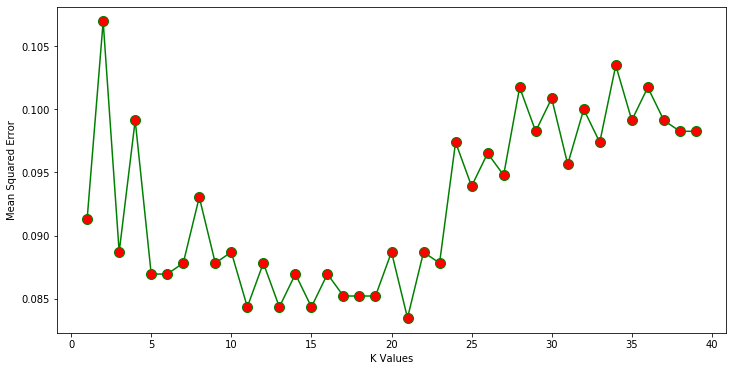

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Values')
plt.ylabel('Mean Squared Error')

**From the output we can see that the mean error is minimum when the value of the K is between 10 and 22.** 

**For k =10**

In [90]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [91]:
y_pred_knn_10 = classifier.predict(xTest)
y_pred_knn_10

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
print("TESTING: \n")
score = classifier.score(xTest, yTest)
print("Accuracy of the model: ",score)
print("Error of the model: ", 1-score)
print("confusion matrix \n", metrics.confusion_matrix(yTest, y_pred_knn_10))
print("report: \n",metrics.classification_report(yTest, y_pred_knn_10))

print("TRAINING: \n")
score = classifier.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING: 

Accuracy of the model:  0.9130434782608695
Error of the model:  0.08695652173913049
confusion matrix 
 [[655  37]
 [ 63 395]]
report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       692
           1       0.91      0.86      0.89       458

    accuracy                           0.91      1150
   macro avg       0.91      0.90      0.91      1150
weighted avg       0.91      0.91      0.91      1150

TRAINING: 

Accuracy of the model:  0.9298550724637681
Error:  0.07014492753623192


**For k = 21**

In [92]:
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [93]:
y_pred_knn_21 = classifier.predict(xTest)
y_pred_knn_21

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
print("TESTING: \n")
score = classifier.score(xTest, yTest)
print("Accuracy of the model: ",score)
print("Error of the model: ", 1-score)
print("confusion matrix \n", metrics.confusion_matrix(yTest, y_pred_knn_21))
print("report: \n",metrics.classification_report(yTest, y_pred_knn_21))

print("TRAINING: \n")
score = classifier.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING: 

Accuracy of the model:  0.9165217391304348
Error of the model:  0.08347826086956522
confusion matrix 
 [[665  27]
 [ 69 389]]
report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       692
           1       0.94      0.85      0.89       458

    accuracy                           0.92      1150
   macro avg       0.92      0.91      0.91      1150
weighted avg       0.92      0.92      0.92      1150

TRAINING: 

Accuracy of the model:  0.9060869565217391
Error:  0.0939130434782609


**(c) Generate a graph that includes 5 ROC curves (one for each of the 5 classifiers) on the testing set.
Compute the Area Under the Curve (AUC) metric for all 5 classifiers.**

In [54]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**Logistic Regression**

AUC: 0.92


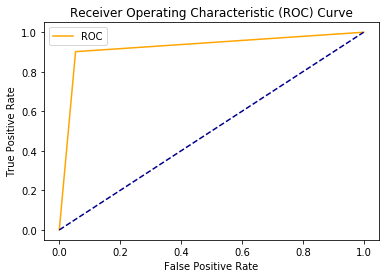

In [56]:
auc = roc_auc_score(yTest, y_pred_reg)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_reg)

plot_roc_curve(fpr, tpr)

**LDA**

AUC: 0.88


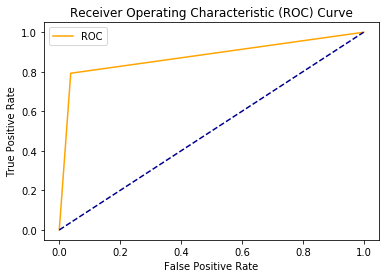

In [55]:
auc = roc_auc_score(yTest, y_pred_lda)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_lda)

plot_roc_curve(fpr, tpr)

**K Nearest Neighbours**

AUC: 0.90


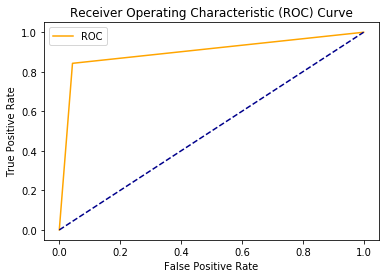

In [58]:
auc = roc_auc_score(yTest, y_pred_knn)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_knn)

plot_roc_curve(fpr, tpr)

**Naive Bayes**

AUC: 0.85


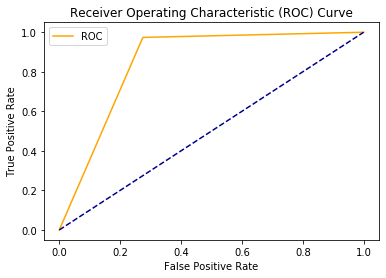

In [64]:
auc = roc_auc_score(yTest, y_pred_nb)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_nb)

plot_roc_curve(fpr, tpr)

**Decision Tree**

AUC: 0.90


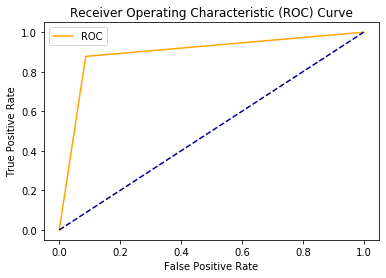

In [68]:
auc = roc_auc_score(yTest, y_pred_dtree)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_dtree)

plot_roc_curve(fpr, tpr)